In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, metrics
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression

In [297]:
train = pd.read_csv('C:/Users/billf/Desktop/Data_Science/LogisticRegressionPractice/titanic_train_data.csv')
test = pd.read_csv('C:/Users/billf/Desktop/Data_Science/LogisticRegressionPractice/titanic_test_data.csv')
test_results = pd.read_csv('C:/Users/billf/Desktop/Data_Science/LogisticRegressionPractice/titanic_gender_submission.csv')

In [298]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
list(train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [300]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [301]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ford, Mrs. Edward (Margaret Ann Watson)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [302]:
train.corr(method='pearson')['Survived']
#train.corr(method='pearson')
#train.corr(method='kendall')
#train.corr(method='spearman')

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [303]:
Pclass_table = train[['Pclass','Survived']].groupby('Pclass').mean().sort_values('Survived',ascending=False)
Pclass_table

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


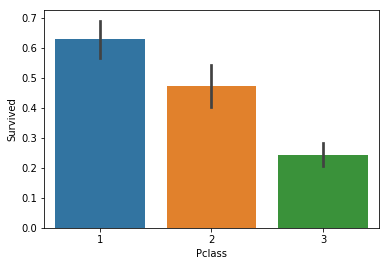

In [304]:
sns.barplot(data=train,x='Pclass',y='Survived')
plt.show()

In [305]:
Fare_table = train[['Fare','Survived']].groupby('Survived',as_index=False).mean().sort_values('Fare',ascending=False)
Fare_table

,Survived,Fare
1,1,48.395408
0,0,22.117887


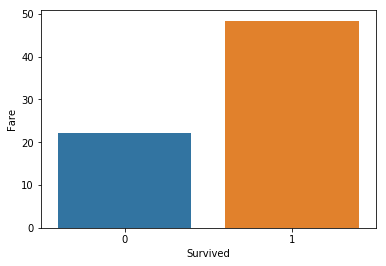

In [306]:
sns.barplot(data=Fare_table,x='Survived',y='Fare')
plt.show()

In [307]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [308]:
Age_table = train[['Age','Survived']].groupby('Survived', as_index=False).mean().sort_values('Age',ascending=False)
Age_table

,Survived,Age
0,0,30.626179
1,1,28.343690


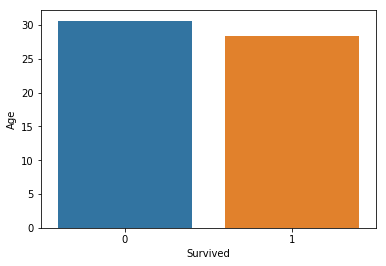

In [309]:
sns.barplot(data=Age_table,x='Survived',y='Age')
plt.show()

In [310]:
sib_table = train[['SibSp','Survived']].groupby('Survived').mean().sort_values('SibSp',ascending=False)
#sib_table

In [311]:
parch_table = train[['Parch','Survived']].groupby('Survived').mean().sort_values('Parch',ascending=False)
#parch_table

In [312]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [313]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

In [314]:
(train['Sex'] == 1).head()

0     True
1    False
2    False
3    False
4     True
Name: Sex, dtype: bool

In [315]:
train.Embarked.groupby(train.Embarked).count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [316]:
train['Embarked'].isnull().sum()

2

In [317]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [318]:
train['Embarked'].isnull().sum()

0

In [319]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [320]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [321]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

In [322]:
train['Age'].isnull().sum()

0

In [323]:
#train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
#test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

In [324]:
#train['Cabin'].unique()
train = train.drop('Cabin',1).drop('Name',1).drop('Ticket',1)
train=train.set_index('PassengerId')
train.head()
test = test.drop('Cabin',1).drop('Name',1).drop('Ticket',1)
test=test.set_index('PassengerId')
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,Q
893,3,0,47.0,1,0,7.0000,S
894,2,1,62.0,0,0,9.6875,Q
895,3,1,27.0,0,0,8.6625,S
896,3,0,22.0,1,1,12.2875,S


In [325]:
train.corr(method='pearson')['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [326]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [327]:
train['Fare'].fillna(train['Fare'].dropna().median(), inplace=True)
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [328]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [329]:
labels = ['Fb_1','Fb_2','Fb_3','Fb_4','Fb_5']
#buckets = [0,8,15,31.1,1000]
train['Fare_buckets'] = pd.qcut(train['Fare'], 5, labels=labels)
test['Fare_buckets'] = pd.qcut(test['Fare'], 5, labels=labels)
train[['Fare_buckets', 'Survived','Fare']].groupby(['Fare_buckets'], as_index=False).mean().sort_values(by='Fare_buckets'
                                                                                                 , ascending=True)

,Fare_buckets,Survived,Fare
0,Fb_1,0.217877,6.822908
1,Fb_2,0.201087,8.623997
2,Fb_3,0.424419,15.215019
3,Fb_4,0.444444,28.922592
4,Fb_5,0.642045,102.629451


In [330]:
train = train.drop('Fare',1)
train = train.rename(columns={'Fare_buckets':'Fare'})
test = test.drop('Fare',1)
test = test.rename(columns={'Fare_buckets':'Fare'})

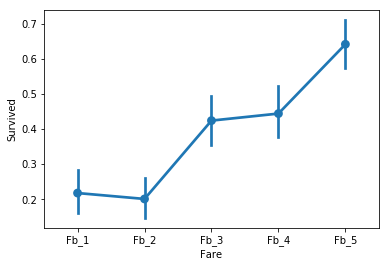

In [331]:
#list(train)
sns.pointplot(x = 'Fare', y = 'Survived',  data=train)
plt.show()

In [332]:
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [333]:
labels = ['Ab_1','Ab_2','Ab_3','Ab_4','Ab_5']
#buckets = [0,8,15,31.1,1000]
bins = [0,22,28,35,65,100]
train['Age_buckets'] = pd.cut(train['Age'], bins = bins, labels=labels)
test['Age_buckets'] = pd.cut(train['Age'], bins = bins, labels=labels)
train[['Age_buckets', 'Survived','Age']].groupby(['Age_buckets'], as_index=False).mean().sort_values(by='Age_buckets'
                                                                                                 , ascending=True)

,Age_buckets,Survived,Age
0,Ab_1,0.424242,14.645758
1,Ab_2,0.331169,26.941558
2,Ab_3,0.437037,31.744444
3,Ab_4,0.392344,46.038278
4,Ab_5,0.125000,71.562500


In [334]:
train = train.drop('Age',1)
train = train.rename(columns={'Age_buckets':'Age'})
test = test.drop('Age',1)
test = test.rename(columns={'Age_buckets':'Age'})

In [335]:
train['TravelAlone']=np.where((
    train["SibSp"]+train["Parch"])>0, 0, 1)
train.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)
test['TravelAlone']=np.where((
    test["SibSp"]+test["Parch"])>0, 0, 1)
test.drop('SibSp', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)

In [336]:
train.head(3)

,Survived,Pclass,Sex,Embarked,Fare,Age,TravelAlone
PassengerId,,,,,,,
1,0,3,1,S,Fb_1,Ab_1,0
2,1,1,0,C,Fb_5,Ab_4,0
3,1,3,0,S,Fb_2,Ab_2,1


In [337]:
train=pd.get_dummies(train, columns=['Pclass','Embarked','Fare','Age'])
test=pd.get_dummies(test, columns=['Pclass','Embarked','Fare','Age'])
#print(list(train))
print(list(test))

['Sex', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_Fb_1', 'Fare_Fb_2', 'Fare_Fb_3', 'Fare_Fb_4', 'Fare_Fb_5', 'Age_Ab_1', 'Age_Ab_2', 'Age_Ab_3', 'Age_Ab_4', 'Age_Ab_5']


In [338]:
X_train = train.drop('Survived',1)
y_train = train['Survived']
scaler = preprocessing.StandardScaler().fit(X_train)

In [339]:
#X_train[list(X_train)]=pd.DataFrame(scaler.transform(X_train))
#X_train.tail()

In [340]:
#X_train=X_train.drop(891,0)
#y_train=y_train.drop(891,0)
np.where(np.isnan(X_train))

(array([], dtype=int64), array([], dtype=int64))

In [341]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)
print(rfecv.n_features_)
print(X_train.columns[rfecv.support_])

11
Index(['Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Fare_Fb_3', 'Age_Ab_1', 'Age_Ab_3', 'Age_Ab_4', 'Age_Ab_5'],
      dtype='object')


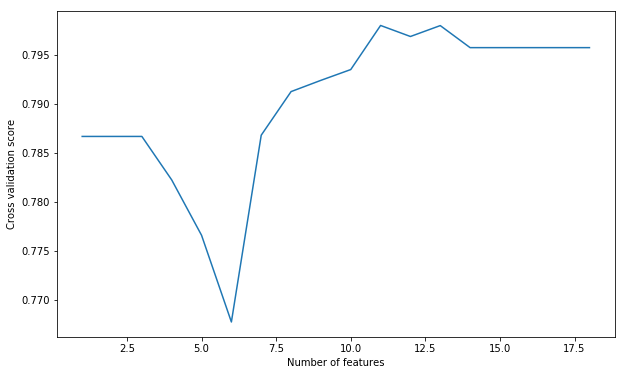

In [342]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [343]:
train_model_features = train[['Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3', 
                     'Embarked_C', 'Embarked_Q', 'Fare_Fb_3', 'Age_Ab_1', 
                     'Age_Ab_3', 'Age_Ab_4', 'Age_Ab_5']]
test_model_features = test[['Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3', 
                     'Embarked_C', 'Embarked_Q', 'Fare_Fb_3', 'Age_Ab_1', 
                     'Age_Ab_3', 'Age_Ab_4', 'Age_Ab_5']]
X_train=train_model_features
y_train=y_train
X_test=test_model_features
X_test.head(3)

,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Fare_Fb_3,Age_Ab_1,Age_Ab_3,Age_Ab_4,Age_Ab_5
PassengerId,,,,,,,,,,,
892,1,0,0,1,0,1,0,0,0,0,0
893,0,0,0,1,0,0,0,0,0,0,0
894,1,0,1,0,0,1,0,0,0,0,0


In [344]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)

In [345]:
print("Training accuracy:",metrics.accuracy_score(y, y_train_pred)*100)

Training accuracy: 80.4713804714


In [346]:
y_test_pred = logreg.predict(X_test)

In [381]:
predicted_survive = y_test_pred

In [392]:
test['Predicted_Survive'] = predicted_survive
test['Survived'] = test_results['Survived']
survival_predictions = test[['Survived','Predicted_Survive']]
#survival_predictions = test['predicted_survive']
#survival_predictions = pd.merge(survival_predictions,test_results,left_index=True)
survival_predictions.head(3)

,Survived,Predicted_Survive
PassengerId,,
892,0,0
893,1,0
894,0,0


In [394]:
print("Test accuracy:",metrics.accuracy_score(survival_predictions['Survived'], survival_predictions['Predicted_Survive'])*100)

Test accuracy: 87.3205741627


In [395]:
survival_predictions.to_csv("survival_predictions.csv", index=True)